In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score ,accuracy_score

In [6]:
df = pd.read_csv("./data/titantic.csv")

In [7]:
df.shape

(891, 12)

In [8]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [13]:
df.dropna(inplace=True)

In [14]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: xlabel='Survived', ylabel='count'>

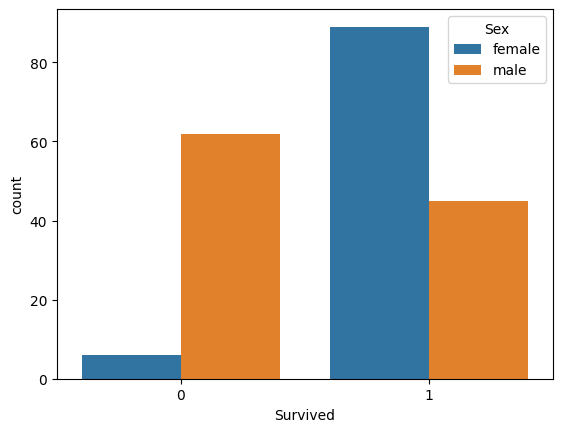

In [15]:
sns.countplot(data=df, x="Survived", hue="Sex")

In [16]:
df.drop(columns=["PassengerId","Cabin","Ticket","Cabin","Name"], inplace=True)

In [17]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,1,1,male,29.699118,0,0,30.5,S


<Axes: xlabel='Fare'>

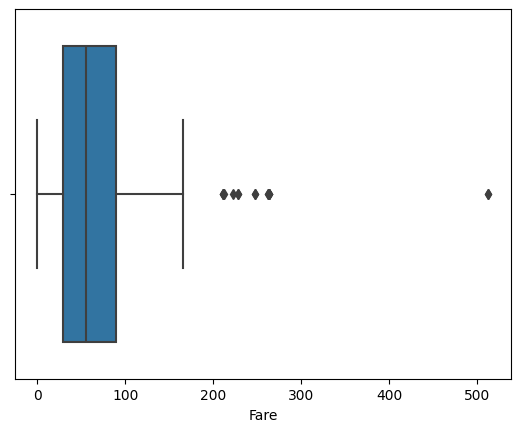

In [18]:
sns.boxplot(data=df, x="Fare")

In [19]:
df = df[df["Fare"] <100] 

In [20]:
df["family"] = df["SibSp"] + df["Parch"]
df["Age"] = df["Age"].astype("int32")

In [21]:
X = df[["Pclass","Sex","Age","Fare","Embarked","family"]]
Y = df["Survived"]

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=42,test_size=0.2)

In [32]:
impute_data = ColumnTransformer(remainder="passthrough",transformers=[
    ("impute_mean", SimpleImputer(strategy="mean"),[2,3]),
    ("impute_mode",SimpleImputer(strategy="most_frequent"),[0,1,4,5])
])

In [25]:
# impute_data.fit_transform(xtrain)

In [33]:
encode_data = ColumnTransformer(remainder="passthrough", transformers=[
    ("encode_data",OneHotEncoder(sparse_output=False,drop="first"),[3,4])
])

In [27]:
lr = LogisticRegression()

In [37]:
pipe  = Pipeline([
    ("impute_data",impute_data),
    ("encode_data",encode_data),
    ("model",lr)
])

In [39]:
pipe.fit(xtrain,ytrain)

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('impute_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_mean',
                                                  SimpleImputer(), [2, 3]),
                                                 ('impute_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 4, 5])])),
                ('encode_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_data',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [3, 4])])),
                ('model', LogisticRegression())])

In [40]:
ypred = pipe.predict(xtest)
print("LR R2 Score -- ",r2_score( y_pred=ypred,y_true=ytest) * 100)
print("LR Accuracy Score ",accuracy_score( y_pred=ypred,y_true=ytest) * 100)


LR R2 Score --  -30.909090909090907
LR Accuracy Score  71.875


In [41]:
dt = DecisionTreeClassifier(max_depth=13)

pipe  = Pipeline([
    ("impute_data",impute_data),
    ("encode_data",encode_data),
    ("model",dt)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print("Decision Train accuracy score ",accuracy_score( y_pred=ypred,y_true=ytest) * 100)

Decision Train accuracy score  78.125


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10,min_samples_leaf=2,n_estimators=200,min_samples_split=10)

# model.fit(xtrain,ytrain)


rfPipe =Pipeline([
    ("impute_data",impute_data),
    ("encode_data",encode_data),
    ("model",model)
])

rfPipe.fit(xtrain,ytrain)
y_pred = rfPipe.predict(xtest)
y_test = ytest

print(accuracy_score(y_pred,  y_test)) 

0.65625


ValueError: Found input variables with inconsistent numbers of samples: [127, 32]